In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix,classification_report

In [3]:
file = pd.read_csv('customer_churn.csv')

In [4]:
file

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
independent_variables  = ['tenure', 'SeniorCitizen', 'MonthlyCharges']

In [6]:
data_iv = file.drop(file.columns.difference(independent_variables), axis=1)

In [7]:
data_iv

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [8]:
data_iv.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
dtype: object

In [9]:
target_variable = ['Churn']

In [10]:
data_tv = file.drop(file.columns.difference(target_variable), axis=1)

In [11]:
data_tv

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [12]:
data_tv.isna().sum()

Churn    0
dtype: int64

In [13]:
data_iv.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

In [14]:
data_iv

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [15]:
data_tv.value_counts()

Churn
No       5174
Yes      1869
dtype: int64

In [16]:
data_iv.value_counts()

SeniorCitizen  tenure  MonthlyCharges
0              1       20.20             11
                       19.75              9
                       19.90              8
                       19.65              8
                       20.05              7
                                         ..
               25      19.60              1
                       19.50              1
                       19.20              1
                       19.15              1
1              72      117.35             1
Length: 6442, dtype: int64

In [17]:
Data_combi = pd.concat([data_iv, data_tv], axis =1)

In [18]:
Data_combi

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


Downsampeling

In [19]:
X = Data_combi.drop('Churn', axis=1)
y = Data_combi['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X_train, y_train)
y_tl.value_counts()

No     3755
Yes    1496
Name: Churn, dtype: int64

In [21]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_tl, y_tl)
predictions = classification.predict(X_test)

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1036
         Yes       0.63      0.55      0.59       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [23]:
classification.score(X_test, y_test)

0.794889992902768

In [24]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[915, 121],
       [168, 205]])

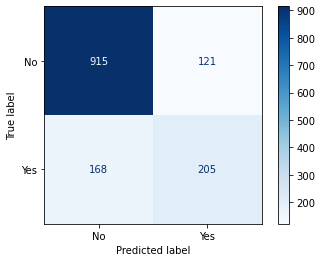

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()

Downsampeling

In [26]:
X1 = Data_combi.drop('Churn', axis=1)
Y1 = Data_combi['Churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [33]:
No = Data_combi[Data_combi['Churn'] == 'No'].sample(1800, replace=True) # needs the replace because it has less than 400 rows
Yes = Data_combi[Data_combi['Churn'] == 'Yes'].sample(1800) # don't need the replace because it has 403 rows

upsampled = pd.concat([Yes, No]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
upsampled.fit_resample(X_train, y_train)


AttributeError: 'DataFrame' object has no attribute 'fit_resample'

In [32]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(No, Yes)
predictions = classification.predict(X_test)

ValueError: could not convert string to float: 'No'

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

without sampeling

In [ ]:
X2 = Data_combi.drop('Churn', axis=1)
Y2 = Data_combi['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [ ]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X2, Y2)
predictions = classification.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))